# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 1), reused 1 (delta 1), pack-reused 21
Receiving objects: 100% (25/25), 1.61 MiB | 5.75 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

**Question 2.1**

In [10]:
cancer = pd.read_csv("the_bootstrap/data/mammogram.csv")

In [6]:
print(cancer['breast_cancer_death'].value_counts())

no     88830
yes     1005
Name: breast_cancer_death, dtype: int64


In [7]:
print(cancer['treatment'].value_counts())

mammogram    44925
control      44910
Name: treatment, dtype: int64


In [8]:
pd.crosstab(cancer['treatment'], cancer['breast_cancer_death'])

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


44910 people underwent control type treatments and 505 of them died. The control type treatments had a survival rate of 98.875%. 44925 people underwent mammogram type treatment and 500 of them died. The mammogram type treatment had a survival rate of 98.887%. The mammogram testing had a superior survival rate by 0.0115%.

**Question 2.2**

In [15]:
cancer['no'] = 0
cancer.loc[cancer['breast_cancer_death']=='no','no']=1

0.00011505110015985753


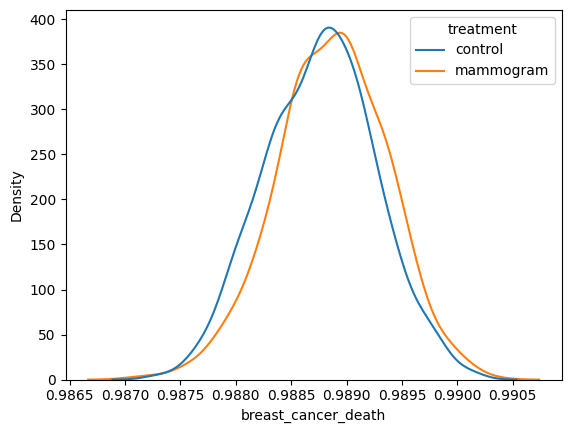

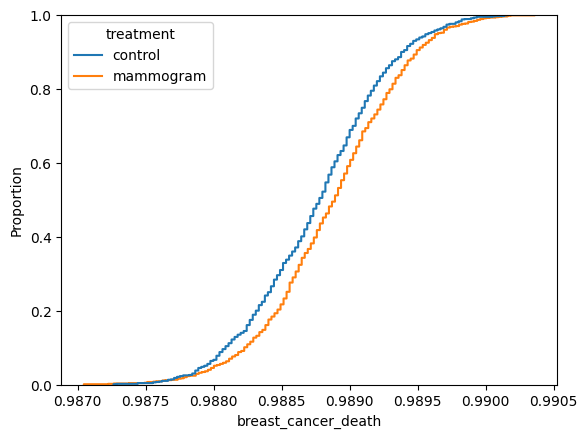

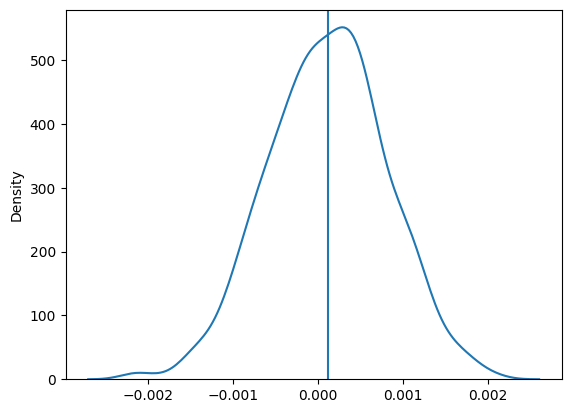

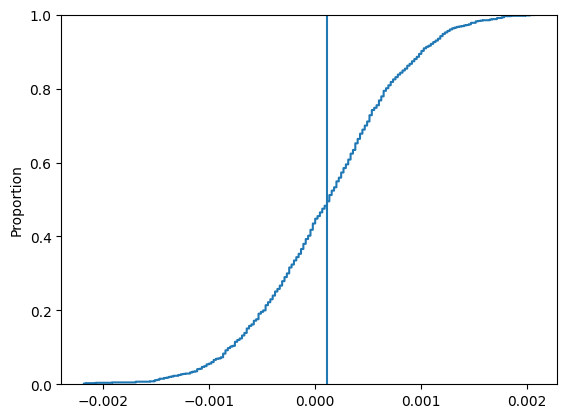

In [16]:
mammogram_0 = cancer.loc[cancer['treatment'] =='mammogram', 'no'].mean()
control_0 = cancer.loc[cancer['treatment'] =='control', 'no'].mean()
diff_0 =  mammogram_0 - control_0
print(diff_0)

#control
cancer_C = cancer.loc[ cancer['treatment'] =='control', 'no' ]
N_C = cancer_C.shape[0]
#mammogram
cancer_M = cancer.loc[ cancer['treatment'] =='mammogram', 'no' ]
N_M = cancer_M.shape[0]


S = 1000
rate_M = np.zeros(S)
rate_C = np.zeros(S)
diff = np.zeros(S)


for s in range(S):
    sample_C = cancer_C.sample(N_C,axis=0,replace=True)
    rate_C[s] = sample_C.mean()
    sample_M = cancer_M.sample(N_M,axis=0,replace=True)
    rate_M[s] = sample_M.mean()
    diff[s] = rate_M[s]-rate_C[s]


rdf_C = pd.DataFrame({'treatment':'control','breast_cancer_death':rate_C})
rdf_M = pd.DataFrame({'treatment':'mammogram','breast_cancer_death':rate_M})
rdf = pd.concat([rdf_C,rdf_M],axis=0)


sns.kdeplot(data=rdf,x='breast_cancer_death',hue='treatment')
plt.show()


sns.ecdfplot(data=rdf,x='breast_cancer_death',hue='treatment')
plt.show()


ax = sns.kdeplot(diff)
ax.axvline(x = diff_0)
plt.show()


ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0)
plt.show()

**Question 2.3**

Point Estimate:  0.00011505110015985753
CI: [-0.00168934  0.00178476]


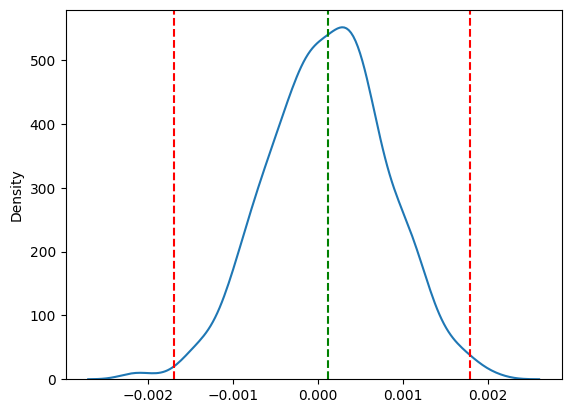

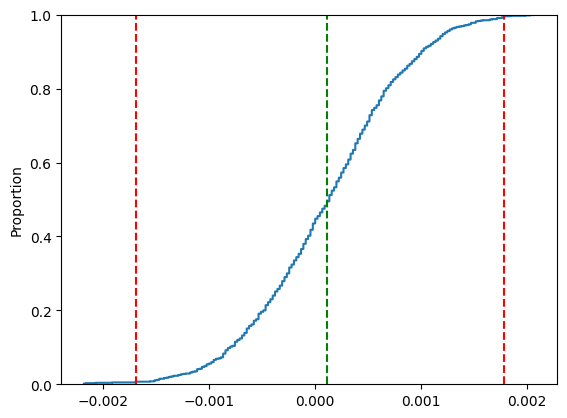

In [17]:
CI = np.quantile(diff,[.005,.995])
print('Point Estimate: ', diff_0)
print( 'CI: ' + str(CI) )

# Density plot of differences in rates, CI:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# ECDF of differences in rates, CI:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

For this confidence interval, zero is within it, implying that we should fail reject the null hypothesis.

**Question 2.4**

While this dataset was robust with 89,000+ observations, there was no information about the demographics or medical history of the patients. A dataset with more medical information that could provide more insights into the women that survived and the ones that did not. There is also not information about treatment types, only detection types. While early detection is important in survival rates it would also be an interesting variable about what stage of cancer it was detected in.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Question 3.1**

In [3]:
diabetes = pd.read_csv("the_bootstrap/data/diabetes_hw.csv")

In [4]:
print(diabetes['outcome'].value_counts())

success    380
failure    319
Name: outcome, dtype: int64


In [5]:
print(diabetes['treatment'].value_counts())

lifestyle    234
rosi         233
met          232
Name: treatment, dtype: int64


In [6]:
diabetes['success'] = 0
diabetes.loc[diabetes['outcome']=='success','success']=1

In [7]:
pd.crosstab(diabetes['treatment'], diabetes['outcome'])

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


**Question 3.2**

In [8]:
success_proportion = diabetes.groupby('treatment')['success'].mean()
print(success_proportion)

treatment
lifestyle    0.534188
met          0.482759
rosi         0.613734
Name: success, dtype: float64


**Question 3.3**

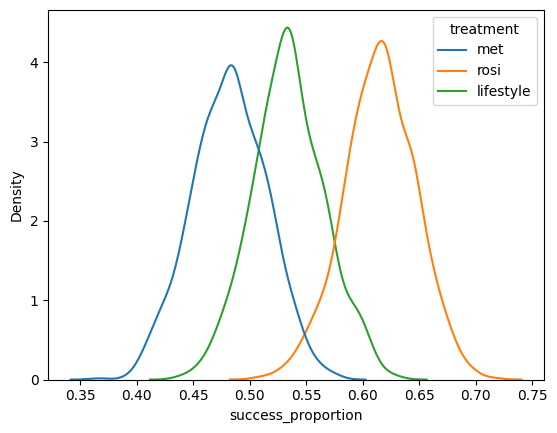

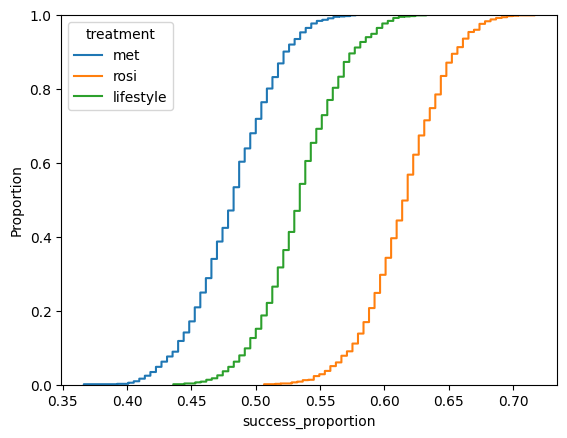

In [9]:
treatments = diabetes['treatment'].unique()

# Simulation:
S = 1000
diff = np.zeros((S, len(treatments)))


##ChatGPT modified my code from 2.2 to get this chunk.
for s in range(S):
    for i, treatment in enumerate(treatments):
        sample_data = diabetes.loc[diabetes['treatment'] == treatment, 'success'].sample(frac=1, replace=True)
        diff[s, i] = sample_data.mean()

rdf = pd.DataFrame({'treatment': np.tile(treatments, S), 'success_proportion': diff.flatten()})
##




rdf['success_proportion'] = rdf['success_proportion'].astype(float)

# Density plot
sns.kdeplot(data=rdf, x='success_proportion', hue='treatment')
plt.show()

# ECDF
sns.ecdfplot(data=rdf, x='success_proportion', hue='treatment')
plt.show()


The rosi treatment appears to be the most effective with about a 60% success rate. The met treatment is the least effective with close to a 45% success rate while the lifestyle treatement is in the middle with slightly above a 50% success rate.

**Question 3.4**

<ipython-input-10-07355d6683c5>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bootstrap_results = bootstrap_results.append({'comparison': comparison_name, 'diff_success_proportion': diff_bootstrap}, ignore_index=True)
<ipython-input-10-07355d6683c5>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bootstrap_results = bootstrap_results.append({'comparison': comparison_name, 'diff_success_proportion': diff_bootstrap}, ignore_index=True)
<ipython-input-10-07355d6683c5>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bootstrap_results = bootstrap_results.append({'comparison': comparison_name, 'diff_success_proportion': diff_bootstrap}, ignore_index=True)


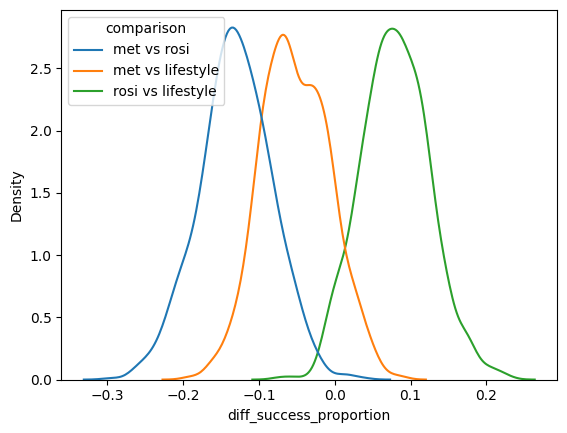

In [10]:
treatments = diabetes['treatment'].unique()

bootstrap_results = pd.DataFrame(columns=['comparison', 'diff_success_proportion'])


S = 1000

##ChatGPT modified code from 2.2 and bootstrap.ipynb
for i in range(len(treatments)):
    for j in range(i+1, len(treatments)):
        treatment_1 = treatments[i]
        treatment_2 = treatments[j]
##



        success_prop_1 = diabetes.loc[diabetes['treatment'] == treatment_1, 'success']
        success_prop_2 = diabetes.loc[diabetes['treatment'] == treatment_2, 'success']


        observed_diff = success_prop_1.mean() - success_prop_2.mean()



##ChatGPT modified code from 2.2 and bootstrap.ipynb
        diff_bootstrap = np.zeros(S)
        for s in range(S):

            sample_1 = success_prop_1.sample(frac=1, replace=True)
            sample_2 = success_prop_2.sample(frac=1, replace=True)


            diff_bootstrap[s] = sample_1.mean() - sample_2.mean()


        comparison_name = f'{treatment_1} vs {treatment_2}'
        bootstrap_results = bootstrap_results.append({'comparison': comparison_name, 'diff_success_proportion': diff_bootstrap}, ignore_index=True)
##




# Plot
sns.kdeplot(data=bootstrap_results.explode('diff_success_proportion'), x='diff_success_proportion', hue='comparison')
plt.show()


Point Estimate: 0.07954587139136493
CI: [-0.1786647180701494 0.12278621473900339]


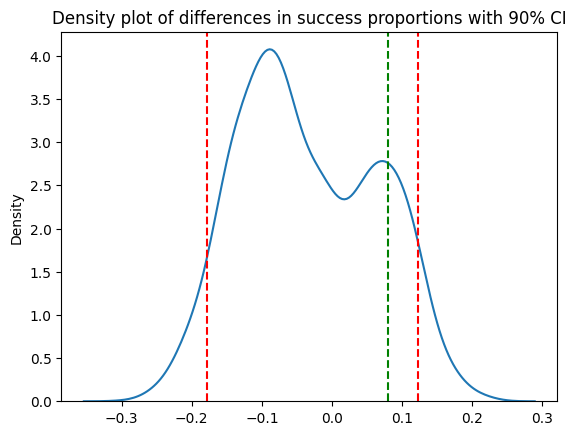

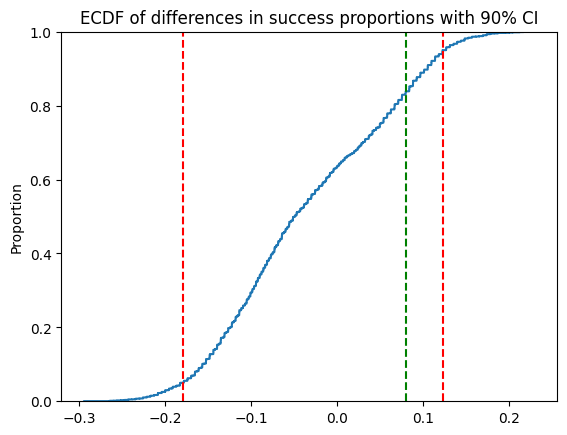

In [11]:
diff_bootstrap_all = bootstrap_results['diff_success_proportion'].explode().to_numpy()
diff_0 = observed_diff


CI = np.quantile(diff_bootstrap_all, [0.05, 0.95])

print('Point Estimate:', diff_0)
print('CI:', CI)


ax = sns.kdeplot(diff_bootstrap_all)
ax.axvline(x=diff_0, linestyle='dashed', color='green')  # Point estimate
ax.axvline(x=CI[0], linestyle='dashed', color='red')  # Lower bound
ax.axvline(x=CI[1], linestyle='dashed', color='red')  # Upper bound
plt.title('Density plot of differences in success proportions with 90% CI')
plt.show()


ax = sns.ecdfplot(diff_bootstrap_all)
ax.axvline(x=diff_0, linestyle='dashed', color='green')  # Point estimate
ax.axvline(x=CI[0], linestyle='dashed', color='red')  # Lower bound
ax.axvline(x=CI[1], linestyle='dashed', color='red')  # Upper bound
plt.title('ECDF of differences in success proportions with 90% CI')
plt.show()


**Question 3.5**

The 90% confidence interval contains zero indicating we should fail to reject the null hypothesis. The largest difference between treatments is the rosi treatment to the met treatment. The most effective treatment overall appears to be the rosi treatment. Like the last dataset, if there is more information about medical information or history, it could provide more information about what groups had better success with different treatments.